<a href="https://colab.research.google.com/github/PIYAL-DATTA/Textual-Storage-Management/blob/main/Advance_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries (run once)
!pip install kagglehub nltk pandas
!pip install pympler

import os
import kagglehub
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize
import sys
import math
import re
from pympler import asizeof

# Download NLTK's sentence tokenizer data (run once)
nltk.download('punkt')
nltk.download('punkt_tab')

C:\Users\Piyal\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Piyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Piyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
print("Path to dataset files:", path)
train_path = os.path.join(path, "Reviews.csv")
column_names = [
    "polarity",
    "review_title",
    "review_text"
]
train_df = pd.read_csv(train_path)
train_df.head()

Path to dataset files: C:\Users\Piyal\.cache\kagglehub\datasets\snap\amazon-fine-food-reviews\versions\2


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
last_column = train_df["Text"]
last_column.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [ ]:
# i = 0
# for text in last_column:
#   sentences = re.split(r'(?<=[.!?]) +', text)
#   for sentence in sentences:
#     i=i+1
#     words = sentence.split()
#     words[:] = [w for w in words if isinstance(w, str)]
#     print(i)
#     print(sentence)
#     print(words)
#     mbst.insert_multiple(words)

> ***Total Word in MLBST***



In [ ]:
class MBSTNode:
    """Node for Multilevel Binary Search Tree"""
    def __init__(self, key):
        self.key = key  # String key
        self.left = None
        self.right = None
        self.child_tree = None  # Child BST for next level

class MultilevelBST:
    """Multilevel Binary Search Tree Implementation for Strings"""

    def __init__(self):
        self.root = None

    def insert(self, keys):
        """Insert a sequence of string keys at multiple levels"""
        if not keys:
            return None

        if self.root is None:
            self.root = MBSTNode(keys[0])
            node = self.root
        else:
            node = self._insert_single_level(self.root, keys[0])

        # Insert remaining keys in child tree
        if len(keys) > 1:
            if node.child_tree is None:
                node.child_tree = MultilevelBST()
            node.child_tree.insert(keys[1:])

        return node

    def _insert_single_level(self, node, key):
        """Insert at a single level (standard BST insertion for strings)"""
        if key < node.key:
            if node.left is None:
                node.left = MBSTNode(key)
                return node.left
            else:
                return self._insert_single_level(node.left, key)
        elif key > node.key:
            if node.right is None:
                node.right = MBSTNode(key)
                return node.right
            else:
                return self._insert_single_level(node.right, key)
        else:
            # Key already exists at this level
            return node

    def traverse_level_order(self):
        """Level order traversal of the current level"""
        result = []
        if self.root is None:
            return result

        queue = [self.root]
        while queue:
            current = queue.pop(0)
            result.append(current.key)

            if current.left:
                queue.append(current.left)
            if current.right:
                queue.append(current.right)

        return result

    def traverse_all_levels(self, level=0):
        """Traverse all levels using DFS"""
        result = {}

        def _traverse(node, current_level):
            if node is None:
                return

            if current_level not in result:
                result[current_level] = []

            result[current_level].append({
                'key': node.key,
                'has_child': node.child_tree is not None
            })

            _traverse(node.left, current_level)
            _traverse(node.right, current_level)

            # Traverse child tree
            if node.child_tree is not None and node.child_tree.root is not None:
                _traverse(node.child_tree.root, current_level + 1)

        _traverse(self.root, level)
        return result

    def get_height(self):
        """Get height of the multilevel tree"""
        def _height(node):
            if node is None:
                return 0

            left_height = _height(node.left)
            right_height = _height(node.right)
            tree_height = max(left_height, right_height) + 1

            # Check child tree height
            child_height = 0
            if node.child_tree is not None:
                child_height = node.child_tree.get_height()

            return max(tree_height, child_height + 1)

        return _height(self.root)

    def is_valid_bst(self):
        """Check if the tree satisfies BST properties at all levels"""
        def _is_valid(node, min_val=None, max_val=None):
            if node is None:
                return True

            # String comparison for BST validation
            if min_val is not None and node.key <= min_val:
                return False
            if max_val is not None and node.key >= max_val:
                return False

            # Check child tree
            child_valid = True
            if node.child_tree is not None:
                child_valid = node.child_tree.is_valid_bst()

            return (child_valid and
                    _is_valid(node.left, min_val, node.key) and
                    _is_valid(node.right, node.key, max_val))

        return _is_valid(self.root)

    def print_tree(self):
        """Print the tree structure in a readable format"""
        levels = self.traverse_all_levels()
        total_word = 0
        for level in sorted(levels.keys()):
            # print(f"Level {level}:")
            count = 0
            for node in levels[level]:
              count = count+1
                # child_marker = " [HAS_CHILD]" if node['has_child'] else ""
                # print(f"  '{node['key']}'{child_marker}")
            # print(count)
            total_word = total_word + count
            # print()
        print(f"Total words in MLBST: {total_word}")

class AdvancedMultilevelBST(MultilevelBST):
    """Extended Multilevel BST with additional operations for strings"""

    def __init__(self):
        super().__init__()
        self.sequence_count = 0

    def insert_multiple(self, sequences):
        """Insert multiple sequences of strings"""
        success_count = 0
        for sequence in sequences:
            if self.insert(sequence):
                success_count += 1
        return success_count

    def find_sequences_with_prefix(self, prefix):
        """Find all sequences that start with the given prefix sequence"""
        results = []

        def _find_sequences(node, current_level, current_path):
            if node is None:
                return

            current_path.append(node.key)

            # Check if we're still matching the prefix
            if current_level < len(prefix):
                if node.key == prefix[current_level]:
                    # Continue matching
                    if current_level == len(prefix) - 1:
                        # Complete match, collect all sequences from here
                        _collect_sequences(node, current_path[:])
                    else:
                        # Continue to child level
                        if node.child_tree:
                            _find_sequences(node.child_tree.root, current_level + 1, current_path)
            else:
                # We've matched the prefix, collect this sequence
                _collect_sequences(node, current_path[:])

            current_path.pop()

            # Continue searching in BST
            if current_level < len(prefix):
                target = prefix[current_level]
                if target <= node.key:
                    _find_sequences(node.left, current_level, current_path[:-1])
                if target >= node.key:
                    _find_sequences(node.right, current_level, current_path[:-1])
            else:
                _find_sequences(node.left, current_level, current_path[:-1])
                _find_sequences(node.right, current_level, current_path[:-1])

        def _collect_sequences(node, path_so_far):
            if node is None:
                return

            # If no child tree, this is a complete sequence
            if node.child_tree is None:
                results.append(path_so_far[:])
            else:
                # Continue collecting from child tree
                _collect_sequences(node.child_tree.root, path_so_far)

            # Also check left and right for alternative sequences
            _collect_sequences(node.left, path_so_far[:-1])
            _collect_sequences(node.right, path_so_far[:-1])

        _find_sequences(self.root, 0, [])
        return results

# Example usage with your exact data
def demonstrate_with_provided_data():
    # Create a multilevel BST
    mbst = AdvancedMultilevelBST()

    # Insert the exact sequences you provided
    sequences = [
        ['I', 'thought', 'there', 'was', 'too', 'much', 'salty', 'flavor', 'to', 'them.'],
        ['However', 'they', 'are', 'good', 'in', 'like', 'a', 'salad', 'or', 'something.'],
        ['I', 'have', 'to', 'admit', 'that', 'when', 'I', 'first', 'tried', "Emerald's", 'Sea', 'Salt', 'and', 'Pepper', 'Cashews', 'I', "didn't", 'like', 'them.'],
        ['Emerald', 'Sea', 'Salt', '&', 'Pepper', 'Cashews', 'is', 'a', 'pleasant', 'treat', 'for', 'cashew', 'lovers.'],
        ['I', 'think', 'there', 'are', 'a', 'lot', 'of', 'folks', 'that', 'will', 'NOT', 'like', 'these', 'cashews,', 'as', 'they', 'are', 'not', 'faint.']
    ]

    # print("Inserting sequences...")
    index = 0
    for text in last_column:
      index = index + 1
      sentences = re.split(r'(?<=[.!?]) +', text)
      for sentence in sentences:
        words = sentence.split()
        mbst.insert_multiple([words])
        # print(f"Successfully inserted {index} sequences")
      #   if index == 400000:
      #     break
      # if index == 400000:
      #   break
    # inserted_count = mbst.insert_multiple(sequences)
    # print(f"Successfully inserted {inserted_count} sequences")


    # Display tree structure
    # print("\nTree structure:")
    mbst.print_tree()

    # Show level order traversal of root level
    # print("Level order traversal of root level:")
    root_level = mbst.traverse_level_order()
    # print(root_level)

    # # Find sequences with specific prefixes
    # print("\nSequences starting with ['I']:")
    # i_seqs = mbst.find_sequences_with_prefix(['I'])
    # for seq in i_seqs:
    #     print(f"  {' → '.join(seq)}")

    # print("\nSequences starting with ['Emerald']:")
    # emerald_seqs = mbst.find_sequences_with_prefix(['Emerald'])
    # for seq in emerald_seqs:
    #     print(f"  {' → '.join(seq)}")

    # print("\nSequences starting with ['I', 'thought']:")
    # i_thought_seqs = mbst.find_sequences_with_prefix(['I', 'thought'])
    # for seq in i_thought_seqs:
    #     print(f"  {' → '.join(seq)}")

    # Tree properties
    print(f"\nTree height: {mbst.get_height()}")
    print(f"Is valid BST: {mbst.is_valid_bst()}")

def demonstrate_simple_example():
    """Simple example to show the structure clearly"""
    print("\n" + "="*50)
    print("SIMPLE EXAMPLE")
    print("="*50)
    # print(f"Total words in MLBST: {total_word}")

    simple_bst = MultilevelBST()

    # Simple sequences that clearly show the structure
    simple_sequences = [
        ['A', 'B', 'C'],
        ['A', 'B', 'D'],
        ['A', 'E', 'F'],
        ['G', 'H', 'I'],
        ['G', 'H', 'J']
    ]

    for seq in simple_sequences:
        simple_bst.insert(seq)

    print("Simple tree structure:")
    simple_bst.print_tree()

    print("All levels detailed view:")
    all_levels = simple_bst.traverse_all_levels()
    for level, nodes in all_levels.items():
        print(f"Level {level}:")
        for node in nodes:
            child_info = " (has child)" if node['has_child'] else ""
            print(f"  '{node['key']}'{child_info}")

if __name__ == "__main__":
    demonstrate_with_provided_data()
    demonstrate_simple_example()

Total words in MLBST: 24956226

Tree height: 1476
Is valid BST: True

SIMPLE EXAMPLE
Simple tree structure:
Total words in MLBST: 10
All levels detailed view:
Level 0:
  'A' (has child)
  'G' (has child)
Level 1:
  'H' (has child)
  'B' (has child)
  'E' (has child)
Level 2:
  'I'
  'J'
  'F'
  'C'
  'D'


> ***Total Word, Unique word and Duplicate word***

In [ ]:
all_words = []
total_bytes = 0  # Initialize total byte counter

for text in last_column:
  sentences = re.split(r'(?<=[.!?]) +', text)
  for sentence in sentences:
    words = sentence.split()
    for word in words:
      all_words.append(word)
      total_bytes += sys.getsizeof(word)


# Existing metrics calculations
total_word_count = len(all_words)
unique_words = set(all_words)
total_unique_word_count = len(unique_words)
word_counts = Counter(all_words)
repeated_words = {word: count for word, count in word_counts.items() if count > 1}
total_repeated_word_count = len(repeated_words)

# NEW: Calculate mean word size in bytes
mean_word_size_bytes = total_bytes / total_word_count if total_word_count > 0 else 0

# Print all results including the new metric
print("Total Word Count:", total_word_count)
print("Total Unique Word Count:", total_unique_word_count)
print("Words that are repeating continuesly count:", total_repeated_word_count)
print("Overall repeated words in Data:", total_word_count-total_unique_word_count)
print("Mean Word Size using ==>sys.getsizeof()<== (bytes):", mean_word_size_bytes)
print("Mean Word Size using ==>asizeof.asizeof()<== (bytes):", asizeof.asizeof(all_words)/total_word_count)

# Existing sentence counting
def count_sentences(text):
    if pd.isna(text):
        return 0
    sentences = sent_tokenize(str(text))
    return len(sentences)

total_sentences = last_column.apply(count_sentences).sum()
print("Total number of sentences:", total_sentences)

print("\n" + "="*25)
print("Calculation")
print("="*25)
print("\n")
print("Normal Memory needed =", asizeof.asizeof(all_words), "bytes")
# ================ MLBST ==============================
MLBST = (asizeof.asizeof(all_words)/total_word_count) * 24956226 # [Total word in MLBST]
print("With MLBST needed =", MLBST, "bytes")
MLBST_saved = asizeof.asizeof(all_words)-MLBST
print("Memory saved by MLBST =", MLBST_saved, "bytes")
print("In percentige =", MLBST_saved*100/asizeof.asizeof(all_words), "%")
# ================ BST ==============================
print("With BST needed =", asizeof.asizeof(unique_words), "bytes")
BST_saved = asizeof.asizeof(all_words)-asizeof.asizeof(unique_words)
print("Memory saved by BST =", BST_saved, "bytes")
print("In percentige =", BST_saved*100/asizeof.asizeof(all_words), "%")

Total Word Count: 45626405
Total Unique Word Count: 586944
Words that are repeating continuesly count: 268837
Overall repeated words in Data: 45039461
Mean Word Size using ==>sys.getsizeof()<== (bytes): 45.426247388984514
Mean Word Size using ==>asizeof.asizeof()<== (bytes): 53.82616298610421
Total number of sentences: 2832806

Calculation


Normal Memory needed = 2455894312 bytes
With MLBST needed = 1343297888.1940515 bytes
Memory saved by MLBST = 1112596423.8059485 bytes
In percentige = 45.30310683035405 %
With BST needed = 48564456 bytes
Memory saved by BST = 2407329856 bytes
In percentige = 98.02253477428958 %


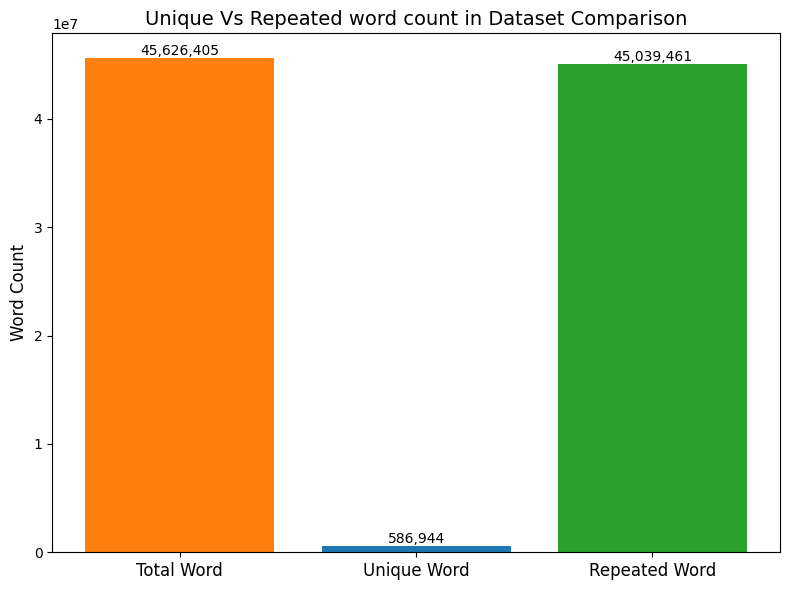

In [ ]:
import matplotlib.pyplot as plt

# Data
methods = ['Total Word', 'Unique Word', 'Repeated Word']
values = [total_word_count, total_unique_word_count, total_word_count-total_unique_word_count]

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(methods, values, color=['#ff7f0e', '#1f77b4', '#2ca02c'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom')

# Customize the chart
plt.title('Unique Vs Repeated word count in Dataset Comparison', fontsize=14)
plt.ylabel('Word Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()

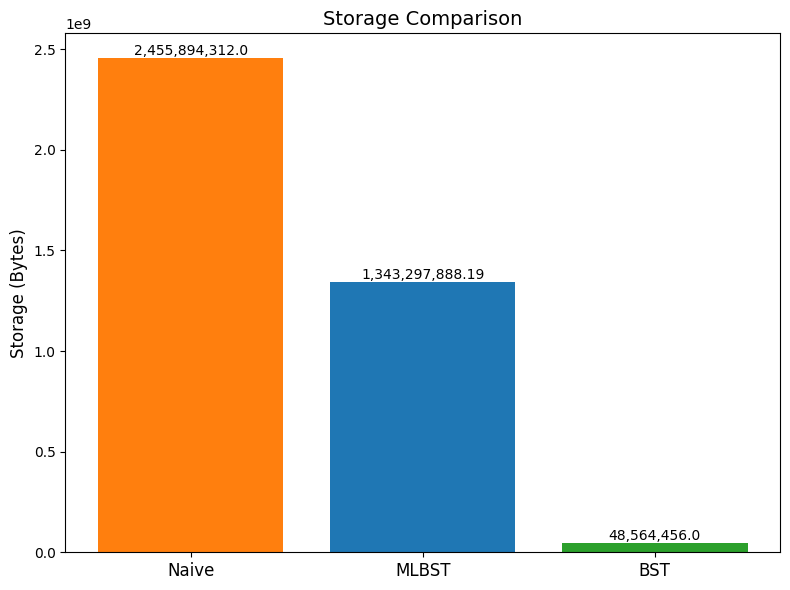

In [ ]:
import matplotlib.pyplot as plt

# Data
methods = ['Naive', 'MLBST', 'BST']
values = [asizeof.asizeof(all_words), round(MLBST, 2), asizeof.asizeof(unique_words)]

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(methods, values, color=['#ff7f0e', '#1f77b4', '#2ca02c'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom')

# Customize the chart
plt.title('Storage Comparison', fontsize=14)
plt.ylabel('Storage (Bytes)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()

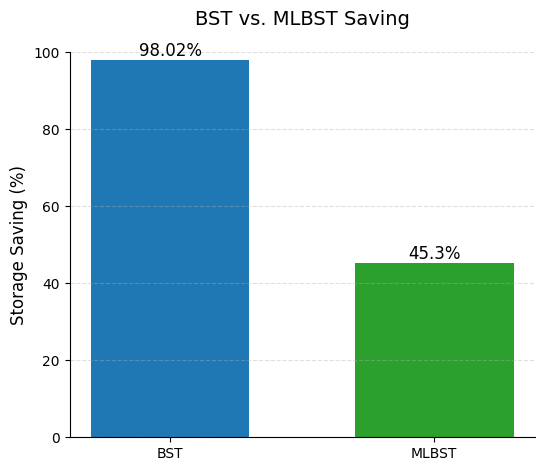

In [ ]:
import matplotlib.pyplot as plt
MLBST_percentage = round(MLBST_saved*100/asizeof.asizeof(all_words), 2)
BST_percentage = round(BST_saved*100/asizeof.asizeof(all_words), 2)
# Data
methods = ['BST', 'MLBST']
percentages = [BST_percentage, MLBST_percentage]  # in %

# Create bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(methods, percentages, color=['#1f77b4', '#2ca02c'], width=0.6)

# Customize y-axis to show percentages
plt.ylim(0, 100)  # Set y-axis range from 0% to 50%
plt.ylabel('Storage Saving (%)', fontsize=12)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}%',
             ha='center', va='bottom', fontsize=12)

# Title and styling
plt.title('BST vs. MLBST Saving', fontsize=14, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove spines for cleaner look
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

In [ ]:
all_words = []
total_bytes = 0  # Initialize total byte counter

for text in last_column:
  sentences = re.split(r'(?<=[.!?]) +', text)
  for sentence in sentences:
    words = sentence.split()
    for word in words:
      all_words.append(word)
      total_bytes += len(word.encode('utf-8'))


# Existing metrics calculations
total_word_count = len(all_words)
unique_words = set(all_words)
total_unique_word_count = len(unique_words)
word_counts = Counter(all_words)
repeated_words = {word: count for word, count in word_counts.items() if count > 1}
total_repeated_word_count = len(repeated_words)

# NEW: Calculate mean word size in bytes
mean_word_size_bytes = total_bytes / total_word_count if total_word_count > 0 else 0
mean_word_size_bytes = round(mean_word_size_bytes, 2)

# Print all results including the new metric
print("Total Word Count:", total_word_count)
print("Total Unique Word Count:", total_unique_word_count)
print("Words that are repeating continuesly count:", total_repeated_word_count)
print("Overall repeated words in Data:", total_word_count-total_unique_word_count)
print("Mean Word Size using ==>len()<== (bytes):", mean_word_size_bytes)



print("\n" + "="*25)
print("Calculation")
print("="*25)
print("\n")
naive = round(total_bytes/1000000, 2)
print("Normal Memory needed =", naive, "MB")
# ================ MLBST ==============================
MLBST = round((mean_word_size_bytes * 24956226)/1000000, 2) # [Total word in MLBST]
print("With MLBST needed =", MLBST, "MB")
MLBST_saved = round(naive-MLBST, 2)
print("Memory saved by MLBST =", MLBST_saved, "MB")
MLBST_percentage = round(MLBST_saved*100/naive, 2)
print("In percentige =", MLBST_percentage, "%")
# ================ BST ==============================
BST = round((total_unique_word_count * mean_word_size_bytes)/1000000, 2)
print("With BST needed =", BST, "MB")
BST_saved = round(naive-BST, 2)
print("Memory saved by BST =", BST_saved, "MB")
BST_percentage = round(BST_saved*100/naive, 2)
print("In percentige =", BST_percentage, "%")

Total Word Count: 45626405
Total Unique Word Count: 586944
Words that are repeating continuesly count: 268837
Overall repeated words in Data: 45039461
Mean Word Size using ==>len()<== (bytes): 4.43

Calculation


Normal Memory needed = 201.93 MB
With MLBST needed = 110.56 MB
Memory saved by MLBST = 91.37 MB
In percentige = 45.25 %
With BST needed = 2.6 MB
Memory saved by BST = 199.33 MB
In percentige = 98.71 %


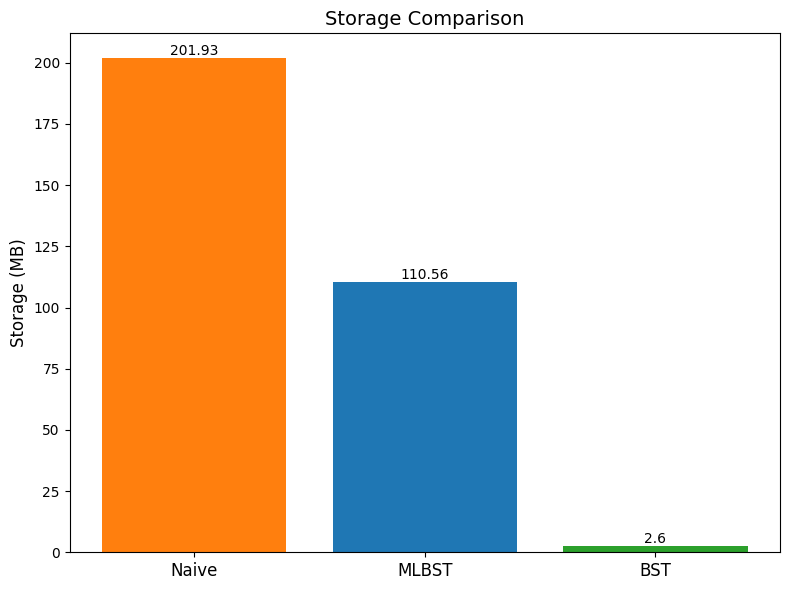

In [ ]:
import matplotlib.pyplot as plt

# Data
methods = ['Naive', 'MLBST', 'BST']
values = [naive, MLBST, BST]

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(methods, values, color=['#ff7f0e', '#1f77b4', '#2ca02c'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom')

# Customize the chart
plt.title('Storage Comparison', fontsize=14)
plt.ylabel('Storage (MB)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()

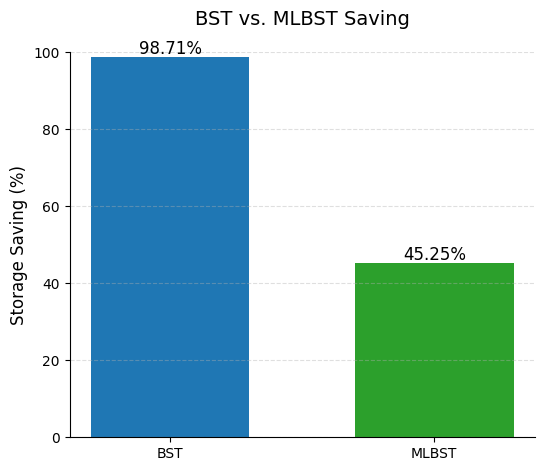

In [ ]:
import matplotlib.pyplot as plt
# Data
methods = ['BST', 'MLBST']
percentages = [BST_percentage, MLBST_percentage]  # in %

# Create bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(methods, percentages, color=['#1f77b4', '#2ca02c'], width=0.6)

# Customize y-axis to show percentages
plt.ylim(0, 100)  # Set y-axis range from 0% to 50%
plt.ylabel('Storage Saving (%)', fontsize=12)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}%',
             ha='center', va='bottom', fontsize=12)

# Title and styling
plt.title('BST vs. MLBST Saving', fontsize=14, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove spines for cleaner look
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()